In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load baseline (sequential) data
with open('baseline_ingestion_timing.json', 'r') as f:
    baseline_data = json.load(f)

# Load async preprocessing data (main.py)
async_data = []
for i in range(1, 11):
    with open(f'preprocessing_times{i}.json', 'r') as f:
        async_data.append(json.load(f))

In [11]:
# Extract total ingestion time (T_total)
baseline_total = [run['T_total'] for run in baseline_data]
async_total = [run['T_preprocessing_total'] for run in async_data]

In [12]:
# Calculate P50 (median) and P95 percentiles
baseline_p50 = np.percentile(baseline_total, 50)
baseline_p95 = np.percentile(baseline_total, 95)
baseline_mean = np.mean(baseline_total)
baseline_std = np.std(baseline_total)

async_p50 = np.percentile(async_total, 50)
async_p95 = np.percentile(async_total, 95)
async_mean = np.mean(async_total)
async_std = np.std(async_total)

C:\Users\cryst\AppData\Local\Temp\ipykernel_33280\3066714306.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([baseline_total, async_total],


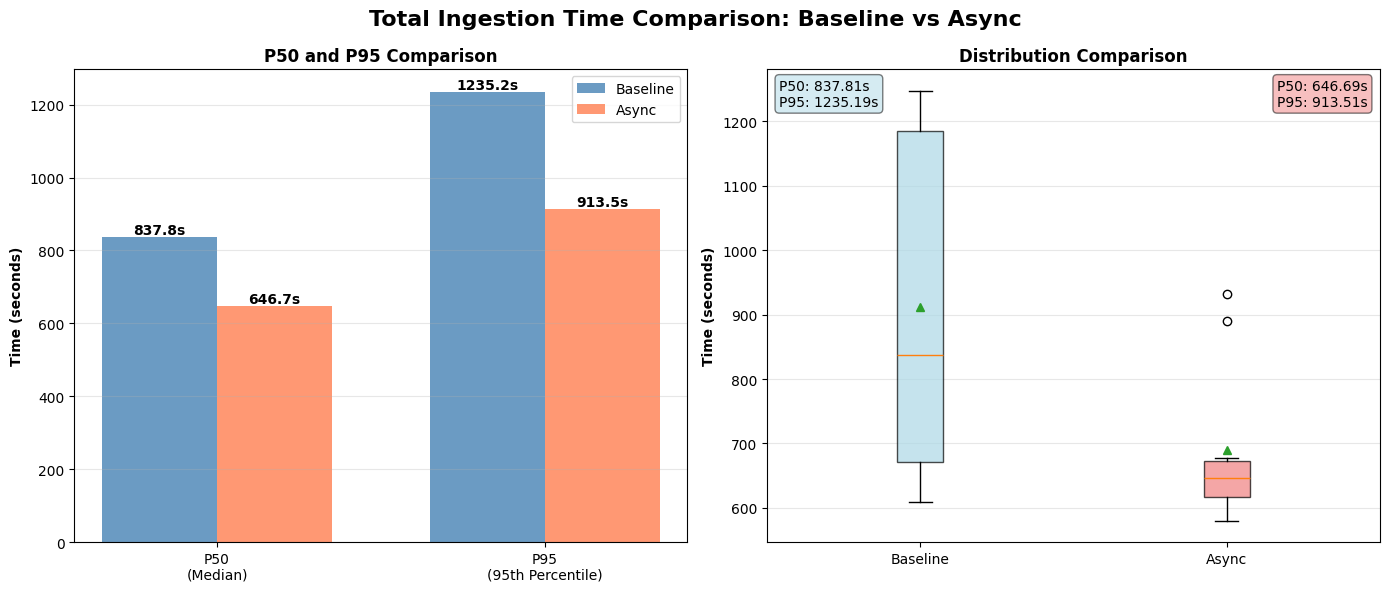

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Total Ingestion Time Comparison: Baseline vs Async', fontsize=16, fontweight='bold')

# Bar chart for P50 and P95 (x-axis = P50/P95, bars = Baseline/Async)
x = np.arange(2)
width = 0.35

baseline_bars = ax1.bar(x - width/2, [baseline_p50, baseline_p95], width, label='Baseline', alpha=0.8, color='steelblue')
async_bars = ax1.bar(x + width/2, [async_p50, async_p95], width, label='Async', alpha=0.8, color='coral')

ax1.set_ylabel('Time (seconds)', fontweight='bold')
ax1.set_title('P50 and P95 Comparison', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(['P50\n(Median)', 'P95\n(95th Percentile)'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [baseline_bars, async_bars]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}s',
               ha='center', va='bottom', fontsize=10, fontweight='bold')

# Box plot comparison
bp = ax2.boxplot([baseline_total, async_total], 
                 labels=['Baseline\n', 'Async\n'],
                 patch_artist=True,
                 showmeans=True)

colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Time (seconds)', fontweight='bold')
ax2.set_title('Distribution Comparison', fontweight='bold', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Add P50 and P95 annotations
ax2.text(0.02, 0.98, f'P50: {baseline_p50:.2f}s\nP95: {baseline_p95:.2f}s', 
        transform=ax2.transAxes, va='top', ha='left',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5), fontsize=10)
ax2.text(0.98, 0.98, f'P50: {async_p50:.2f}s\nP95: {async_p95:.2f}s', 
        transform=ax2.transAxes, va='top', ha='right',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5), fontsize=10)

plt.tight_layout()
plt.show()